In [3]:
from vega_datasets import data
import pandas as pd
import requests

In [10]:
df = data.sf_temps()

In [11]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [12]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [13]:
df = df.set_index('date').sort_index()


In [14]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

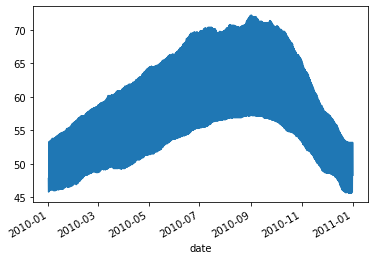

In [15]:
# plot the data to get an overview
df.temp.plot()

<AxesSubplot:xlabel='date'>

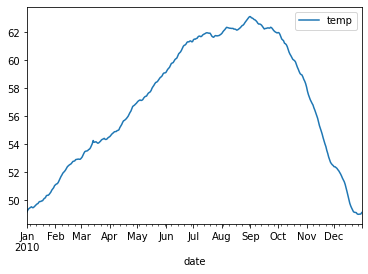

In [16]:
# Resample by the day and take the average temperature. Visualize the average temperature over time.

df.resample('D').mean().plot()

#### 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

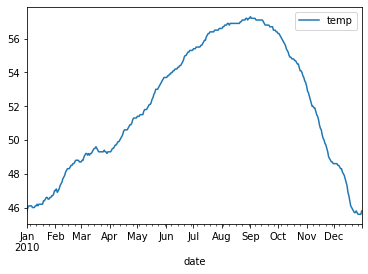

In [18]:
df.resample('D').min().plot()

#### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

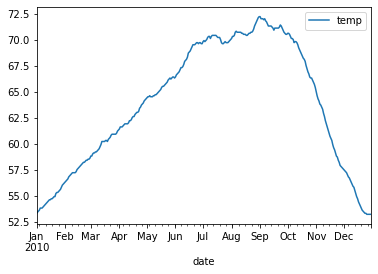

In [19]:
df.resample('D').max().plot()

#### 4. Which month is the coldest, on average?

#### 5. Which month has the highest average temperature?

In [20]:
df.resample('M').mean().temp.sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [24]:
daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [25]:
# create a new column team difference (daily max - daily min)

daily['temp_diff'] = daily['max'] - daily['min']
daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [26]:
# Which month has the highest daily temperature variability?

daily.resample('M').max().temp_diff.sort_values()

date
2010-12-31     8.9
2010-01-31     9.3
2010-02-28     9.9
2010-11-30    11.8
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-10-31    14.4
2010-06-30    14.8
2010-07-31    14.8
2010-09-30    14.9
2010-08-31    15.0
Name: temp_diff, dtype: float64

<AxesSubplot:xlabel='date'>

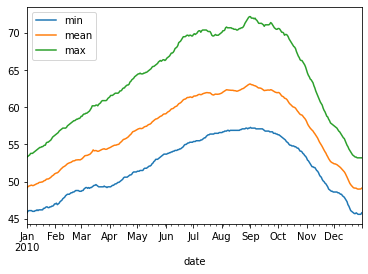

In [27]:
# Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, 
# i.e. the min, average, and maximum temperature should be 3 seperate lines.

df.temp.resample('D').agg(['min', 'mean', 'max']).plot()

In [37]:
from vega_datasets import data
data.seattle_weather()
sea = data.seattle_weather()

In [40]:
sea.date.head()

0   2012-01-01
1   2012-01-02
2   2012-01-03
3   2012-01-04
4   2012-01-05
Name: date, dtype: datetime64[ns]

In [41]:
# set date as index and sort index

sea = sea.set_index('date').sort_index()

In [43]:
# Which year and month combination has the highest amount of precipitation?

sea.resample('M').sum().precipitation.sort_values().tail()

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

<AxesSubplot:xlabel='date'>

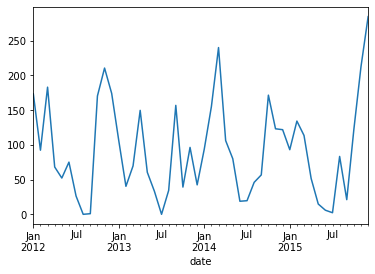

In [44]:
# Visualize the amount of monthly precipitation over time 

sea.precipitation.resample('M').sum().plot()

<AxesSubplot:xlabel='date'>

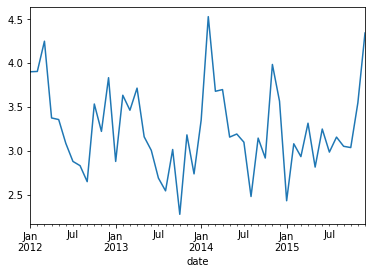

In [45]:
# Visualize the amount of wind over time. Choose a time interval you think is appropriate.

sea.wind.resample('M').mean().plot()

In [46]:
# Which year-month combination is the windiest?

sea.wind.resample('M').mean().sort_values().tail()

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

In [47]:
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

sea.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64